## Testing U-Net_Cell `DHM_model.hdf5` with `patchify, unpatchify` functions.

In [89]:
from model import *
from data_128 import *
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.models import load_model
from patchify import patchify, unpatchify
import tifffile as tiff

(799, 799)


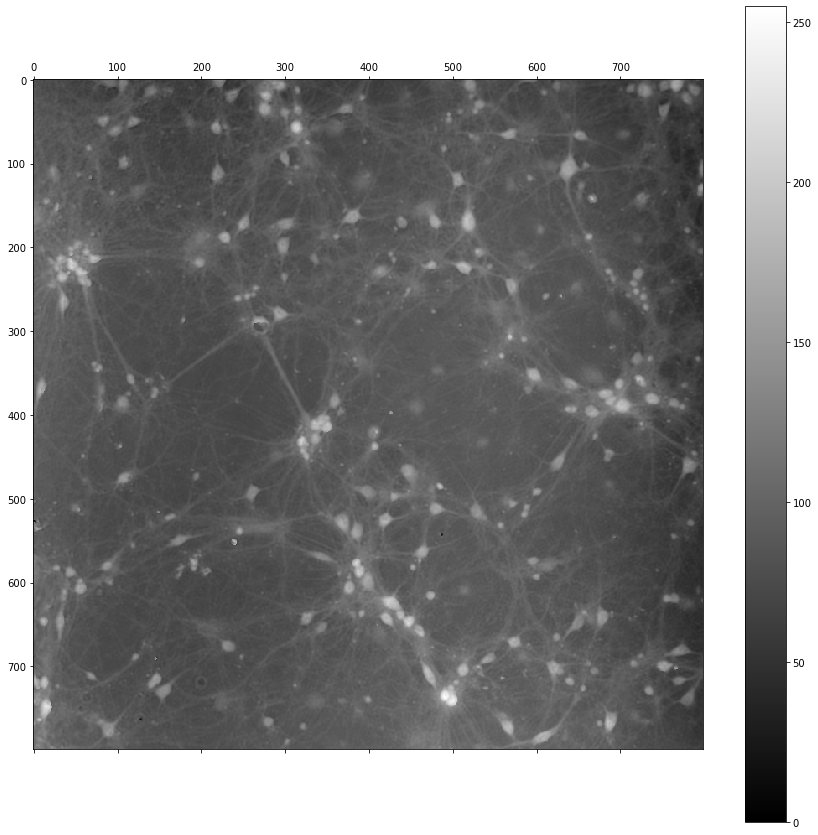

In [90]:
# get Grayscale image
DHM_img = io.imread('/Users/behnazyazdani/Unet_Cells/Img-Cells/test/img/RatNeuron_3_666_Bw_2_5X.tif')
print(DHM_img.shape)
plt.figure(figsize=(15,15))
plt.matshow(DHM_img, cmap='gray', fignum=0)
plt.colorbar()
plt.show()

### Extract patches and save them

In [98]:
patches = patchify (DHM_img, (128,128), step=61) # split image into 12*12 small 128*128 patches.
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        single_patch_img = patches[i,j,:,:]
        io.imsave('/Users/behnazyazdani/Unet_Cells/Img-Cells/test/patch/'+'RatNeuron_3_666_Bw_2_5X_'+str(i)+'_'+str(j)+".tif",single_patch_img)

#### Show patches in a 10x10 grid

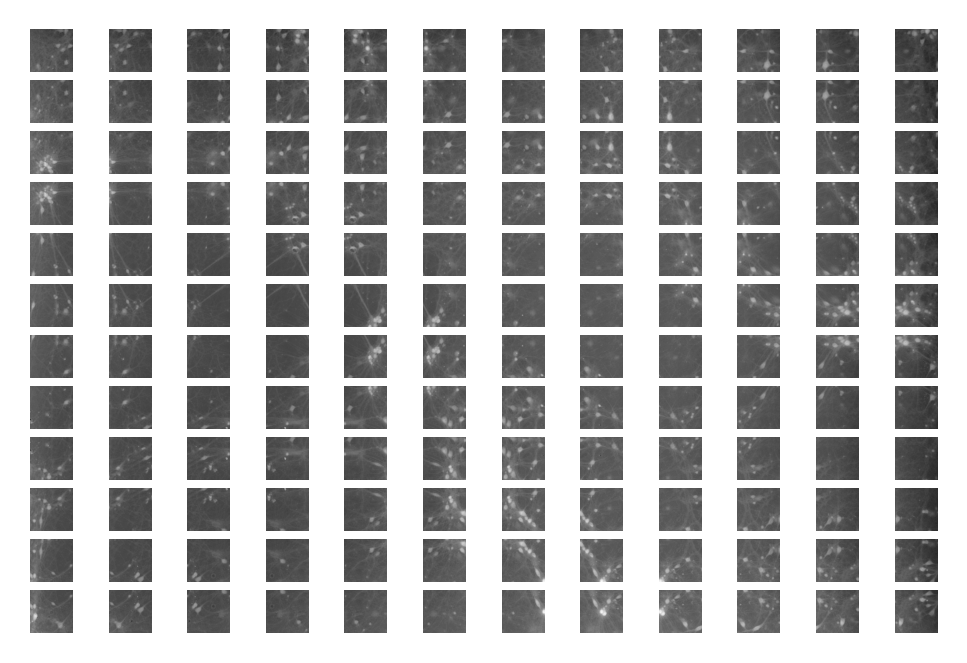

In [99]:
dpi = 300
plot_width, plot_height = 1200, 800
width_inches, height_inches = plot_width/dpi, plot_height/dpi

fig, ax = plt.subplots(patches.shape[0], patches.shape[0], figsize=(width_inches, height_inches), dpi=dpi, facecolor='w', edgecolor='k', frameon=False)

for i in range(patches.shape[0]):
    for j in range(patches.shape[0]):
        im = patches[i,j,:,:]
        ax[i, j].axis('off')
        ax[i, j].imshow(im,cmap='gray', vmin=0,vmax=255)

### Load model and segment patches

In [100]:
model = load_model('DHM_Cell.hdf5')

In [101]:
# Predict the test data
NUM_TEST_IMAGES= patches.shape[0]*patches.shape[0]
test_path="/Users/behnazyazdani/Unet_Cells/Img-Cells/test/patch"
file_list = [f for f in os.listdir(test_path) if f[-3:]=="tif"]
#print(file_list)   

testGene = testGenerator(test_path,file_list)
print(type(testGene))
print(np.shape(testGene))
results = model.predict_generator(testGene,NUM_TEST_IMAGES,verbose=1)
saveResult("Img-Cells/test/patch_prediction",results,file_list)

<class 'generator'>
()
  1/144 [..............................] - ETA: 1:36

2023-01-09 15:56:11.358066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 5s 28ms/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


### Load  and show prediction results of patches

In [7]:
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        single_patch_img = io.imread('Img-Cells/test/patch_prediction/'+'RatNeuron_3_666_Bw_2_5X_' + str(i) + '_' + str(j) + '_' +'predict'+'.png')  # Read a patch image.
        if single_patch_img is None:
            raise Exception("Could not read the image") 
        patches[i, j,:, :] = single_patch_img.copy()  # Copy single path image to patches

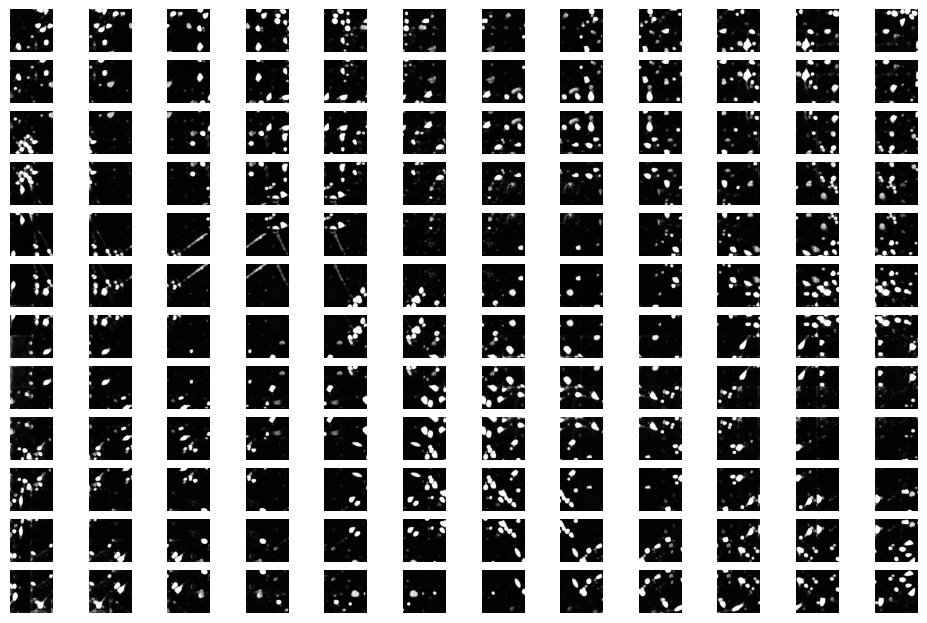

In [8]:
# Show patches in a 10x10 grid
dpi = 100
plot_width, plot_height = 1200, 800
width_inches, height_inches = plot_width/dpi, plot_height/dpi

fig, ax = plt.subplots(patches.shape[0], patches.shape[0], figsize=(width_inches, height_inches), dpi=dpi, facecolor='w', edgecolor='k', frameon=False)

for i in range(patches.shape[0]):
    for j in range(patches.shape[0]):
        im = patches[i,j,:,:]
        ax[i, j].axis('off')
        ax[i, j].imshow(im,cmap='gray')

#### Recounstructing large image with `unpatchify` function.

 If the patches are overlapped, the overlapped patches will be de-overlapped. E.g. for the 1d case, the original image is [a,b,c], patchily with step size 1 produces two patches. Patch 1 is [a,b] and patch 2 is [b, c], then the patch 2 will be trimmed to [c] only when doing unpatchify. Then it will be concatenated with [a,b] to recover the original [a,b,c] image.

* Condition for spiliting image and merging patches with the  `patchify`  and  `unpatchify` functions, have been already explained on `Image_decomposition_composition.ipynb` 

In [102]:
assert patches.shape == (12, 12, 128, 128)
reconstructed_image = unpatchify(patches, DHM_img.shape)
assert (reconstructed_image == DHM_img).all()

### Save and visualize large image

In [10]:
io.imsave('Img-Cells/test/unpatch_prediction/'+'U_DHM_RatNeuron_3_666_Bw_2_5X'+".tif",reconstructed_image)

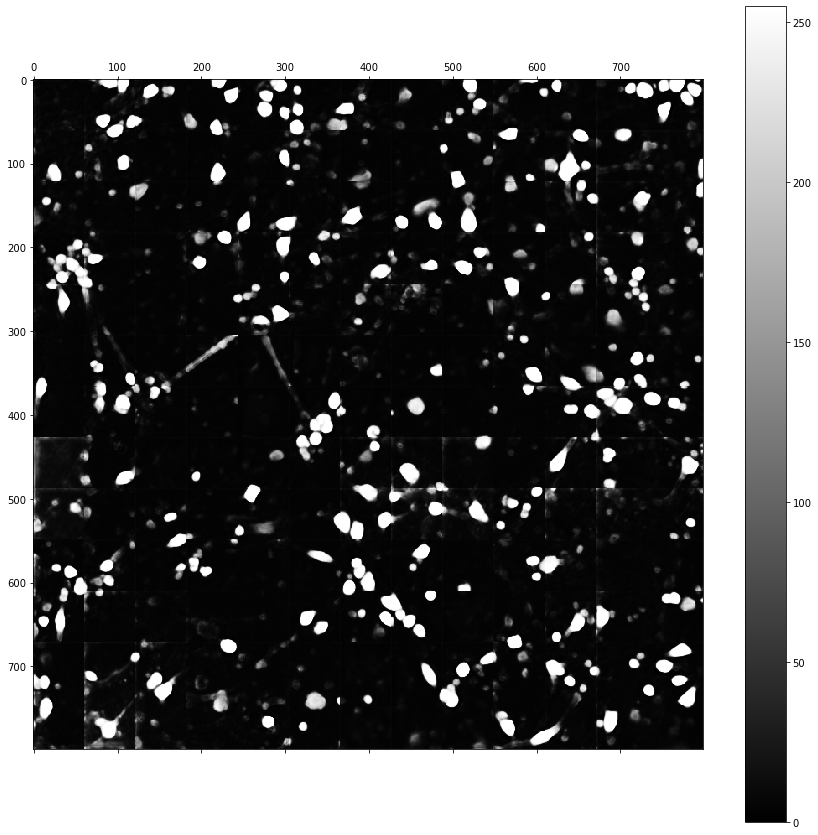

In [11]:
plt.figure(figsize=(15,15))
plt.matshow(reconstructed_image, cmap='gray', fignum=0)
plt.colorbar()
plt.show()